- 머신러닝 패키지 sklearn 설치

In [2]:
# !pip insall sklearn
# conda install sklearn

In [1]:
# 경고 메세지 출력 안하기
import warnings

warnings.filterwarnings(action='ignore')

In [4]:
import pandas as pd
import numpy as np

from sklearn import datasets
boston = datasets.load_boston()

# 데이터 수집

# 데이터 준비 및 탐색

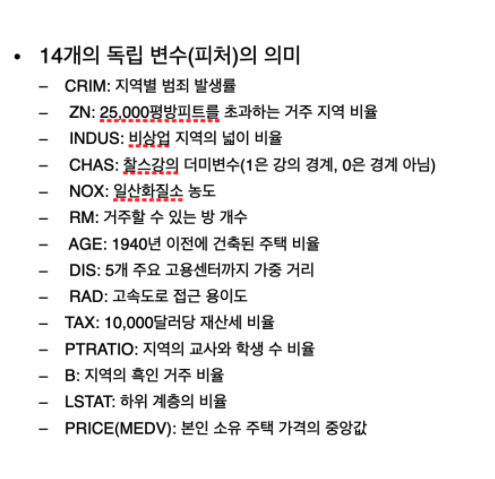

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
boston_df.shape

(506, 13)

In [12]:
boston_df['PRICE'] = boston.target
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


# 분석 모델 구축

In [14]:
X = boston_df.drop(['PRICE'], axis=1)
y = boston_df['PRICE']

In [29]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# 트레인 데이터, 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=156
)

In [100]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
49,0.21977,0.0,6.91,0.0,0.448,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
19,0.72580,0.0,8.14,0.0,0.538,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
261,0.53412,20.0,3.97,0.0,0.647,7.520,89.4,2.1398,5.0,264.0,13.0,388.37,7.26
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52


In [24]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


In [25]:
# 선형회귀 분석 : 모델 생성
lr = LinearRegression()

In [26]:
# 모델 훈련
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
# 예측
Y_predict = lr.predict(X_test)

In [31]:
# 예측(앞에서 5개) - 차이가 크다
Y_predict[:5]

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641])

In [34]:
# 정답
y_test

210    21.7
15     19.9
264    36.5
396    12.5
234    29.0
       ... 
393    13.8
325    24.6
53     23.4
401     7.2
178    29.9
Name: PRICE, Length: 152, dtype: float64

# 결과 분석 및 시각화

## 정확도 계산

In [70]:
# 오차들을 제곱해서 준다
mse = mean_squared_error(y_test, Y_predict)
# mse에 root를 씌운게 rmse다
rmse = np.sqrt(mse) 
print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
# r2에 정답, 예측 넣으면 점수나옴
print(f'R^2(Variance score) : {r2_score(y_test, Y_predict):.3f}') 

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757


mse나 rmse는 어쩌라는걸까요? 비교할 때 한다. 모델을 선정할 때, 오차율, 오차가 적을수록 좋다.

R2는 대충 알겟다 → 크면 정확도처럼 좋다

In [41]:
# 절편
lr.intercept_

40.995595172164336

In [42]:
# 회귀계수
lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [47]:
#보기 어려우니 소수점 1번째 까지 반올림
np.round(lr.coef_, 1)

array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [45]:
# 위와 같이 보면서 비교
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [50]:
# 보기 편하게 Series로 (index + values)
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns)
coef

CRIM       -0.11
ZN          0.07
INDUS       0.03
CHAS        3.05
NOX       -19.80
RM          3.35
AGE         0.01
DIS        -1.74
RAD         0.36
TAX        -0.01
PTRATIO    -0.92
B           0.01
LSTAT      -0.57
dtype: float64

In [51]:
# 오름차순 정렬
coef.sort_values()

NOX       -19.80
DIS        -1.74
PTRATIO    -0.92
LSTAT      -0.57
CRIM       -0.11
TAX        -0.01
AGE         0.01
B           0.01
INDUS       0.03
ZN          0.07
RAD         0.36
CHAS        3.05
RM          3.35
dtype: float64

In [52]:
# 내림차순 정렬
coef.sort_values(ascending=False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

In [55]:
# 인덱스로 정렬
coef.sort_index()

AGE         0.01
B           0.01
CHAS        3.05
CRIM       -0.11
DIS        -1.74
INDUS       0.03
LSTAT      -0.57
NOX       -19.80
PTRATIO    -0.92
RAD         0.36
RM          3.35
TAX        -0.01
ZN          0.07
dtype: float64

시리즈로 정렬하는게 index, values 둘 다 활용 가능해서 좋다

In [56]:
coef.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [57]:
coef.values

array([-1.10e-01,  7.00e-02,  3.00e-02,  3.05e+00, -1.98e+01,  3.35e+00,
        1.00e-02, -1.74e+00,  3.60e-01, -1.00e-02, -9.20e-01,  1.00e-02,
       -5.70e-01])


## 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

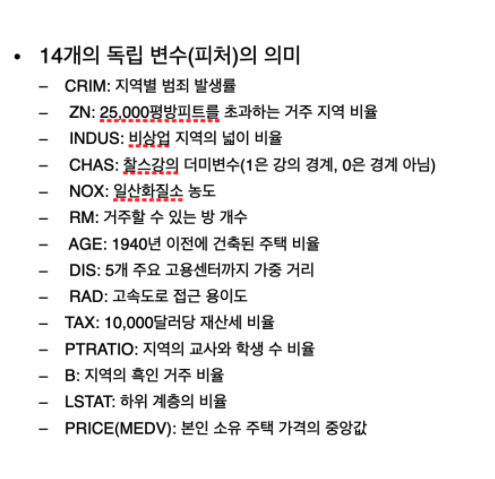

In [69]:
x_features = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT'
]

for i, feature in enumerate(x_features):
    print('i : ', i)
    # 한 줄에 3개씩 넣어라
    row = int(i / 3)
    # 3개 이상 들어가면 되서 계산
    col = i % 3
    print('row : ', row)
    print('col : ', col)

i :  0
row :  0
col :  0
i :  1
row :  0
col :  1
i :  2
row :  0
col :  2
i :  3
row :  1
col :  0
i :  4
row :  1
col :  1
i :  5
row :  1
col :  2
i :  6
row :  2
col :  0
i :  7
row :  2
col :  1
i :  8
row :  2
col :  2
i :  9
row :  3
col :  0
i :  10
row :  3
col :  1
i :  11
row :  3
col :  2
i :  12
row :  4
col :  0


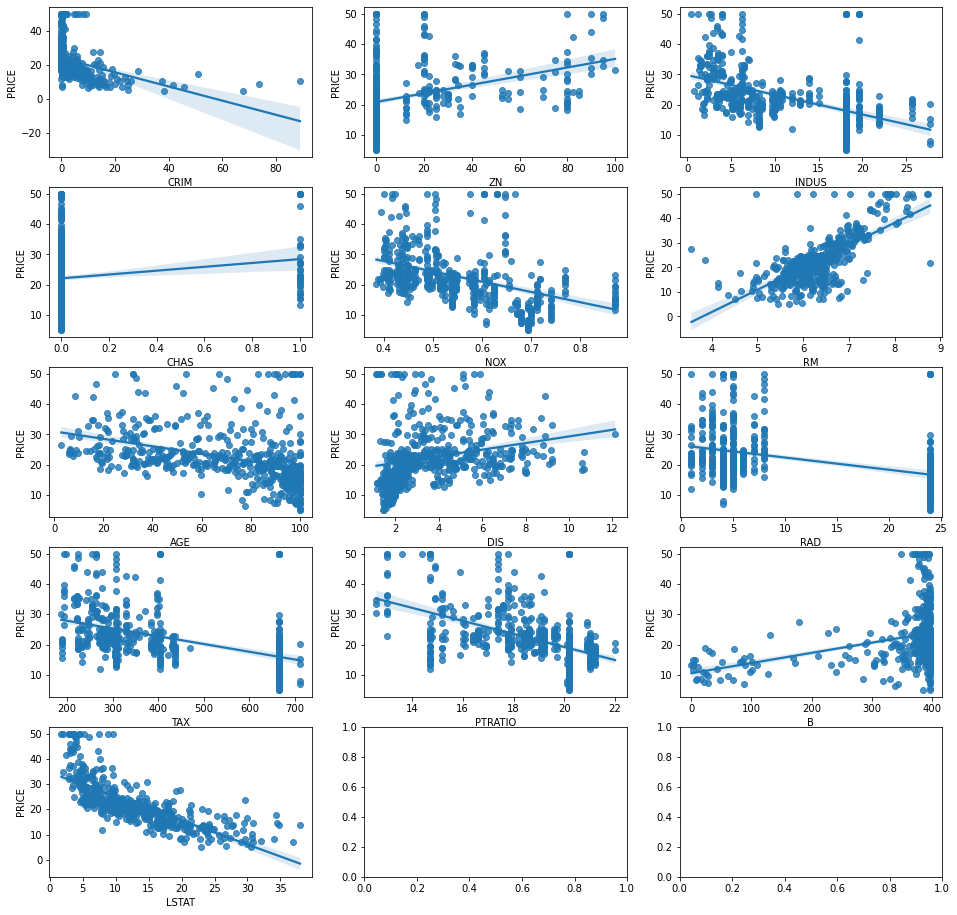

In [67]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

x_features = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT'
]

for i, feature in enumerate(x_features):
    # 한 줄에 3개씩 넣어라
    row = int(i / 3)
    # 3개 이상 들어가면 되서 계산
    col = i % 3
    # x, y는 컬럼명
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

In [71]:
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [72]:
# 서비스할때, scaling한 값을 넣어줘야함
# 전체train data를 scaling할때는 전체 범위 fit
# 하나를 넣을 때는 fit 따로 시켜주고, transform 시킨 값을 넣어줘야함
# 탈퇴한 고객일지 아닌지 상황
# 넣을땐 ndarray 2차원으로 넣어주기
lr.predict([[0.001, 15, 1, 0, 0.59, 5, 10, 0, 1, 10, 5, 100, 1]])

array([43.25278829])

train data 넣어보고, test data랑 비교

mse도 train과 test 비교

train r2, test r2 어떻게 다른지?

In [76]:
# train data 넣어서 예측
# 예측
train_predict = lr.predict(X_train)

In [74]:
r2_score(y_train, train_predict)

0.7273505005599823

In [77]:
mse = mean_squared_error(y_train, train_predict)
mse

24.42999235657573

In [78]:
rmse = np.sqrt(mse)
rmse

4.942670569295078

서비스 하는것처럼 입력값 받아보기

In [90]:
# 0.001,15,1,0,0.59,5,10,0,1,10,5,100,1
one_person = input().split(',')

data2 = []
for one in one_person:
    data2.append(float(one))
    
data2

0.001,15,1,0,0.59,5,10,0,1,10,5,100,1


[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]

In [91]:
# 입력값으로 예측
user_data = [data2]
lr.predict(user_data)

array([43.25278829])

scaling 담당 함수 만들어두기<br/>
fit 시키고 transform 시키는 함수를 만들어두는게 좋다

In [93]:
CRIM = input('CRIM>> ') 
ZN = input('ZN>> ') 
INDUS = input('INDUS>> ') 
CHAS = input('CHAS>> ') 
NOX = input('NOX>> ') 
RM = input('RM>> ') 
AGE = input('AGE>> ') 
DIS = input('DIS>> ') 
RAD = input('RAD>> ') 
TAX = input('TAX>> ') 
PTRATIO = input('PTRATIO>> ') 
B = input('B>> ') 
LSTAT = input('LSTAT>> ')
# client -> server 
# str로 받고 서버에서 convert시키자
# 0.001, 15, 1, 0, 0.59, 5, 10, 0, 1, 10, 5, 100, 1

CRIM>> 0.001
ZN>> 15
INDUS>> 1
CHAS>> 0
NOX>> 0.59
RM>> 5
AGE>> 10
DIS>> 0
RAD>> 1
TAX>> 10
PTRATIO>> 5
B>> 100
LSTAT>> 1


In [94]:
data_list = [
    CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT
]
len(data_list)

13

In [98]:
# float으로 변환하여 2차원으로 변형하여 predict!
data_list2 = [list(map(lambda x: float(x) , data_list))]
data_list2

[[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]]

In [99]:
lr.predict(data_list2)

array([43.25278829])